In [12]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
URL = "http://corona-api.com/countries/US"

USA_Json = requests.get(URL).json()


In [33]:
USA_timeline = USA_Json["data"]["timeline"]
USA_timeline
date = []
confirmed = []
USA_timeline

[{'updated_at': '2021-03-11T05:25:48.000Z',
  'date': '2021-03-11',
  'deaths': 529263,
  'confirmed': 29154659,
  'recovered': 0,
  'new_confirmed': 58611,
  'new_recovered': 0,
  'new_deaths': 1564,
  'active': 28625396},
 {'updated_at': '2021-03-10T05:24:35.000Z',
  'date': '2021-03-10',
  'deaths': 527699,
  'confirmed': 29096048,
  'recovered': 0,
  'new_confirmed': 57417,
  'new_recovered': 0,
  'new_deaths': 1947,
  'active': 28568349},
 {'updated_at': '2021-03-09T05:28:19.000Z',
  'date': '2021-03-09',
  'deaths': 525752,
  'confirmed': 29038631,
  'recovered': 0,
  'new_confirmed': 45321,
  'new_recovered': 0,
  'new_deaths': 721,
  'active': 28512879},
 {'updated_at': '2021-03-08T05:24:48.000Z',
  'date': '2021-03-08',
  'deaths': 525031,
  'confirmed': 28993310,
  'recovered': 0,
  'new_confirmed': 40340,
  'new_recovered': 0,
  'new_deaths': 669,
  'active': 28468279},
 {'updated_at': '2021-03-07T05:21:54.000Z',
  'date': '2021-03-07',
  'deaths': 524362,
  'confirmed': 289

In [34]:
try:

    for time in range(0, len(USA_timeline)):
        if time == 0:
            date.append(USA_timeline[time]["date"])
            confirmed.append(USA_timeline[time]["new_confirmed"])
        elif USA_timeline[time+1]["date"] != USA_timeline[time]["date"]:
            date.append(USA_timeline[time+1]["date"])
            confirmed.append(USA_timeline[time+1]["new_confirmed"])
            
except:
    
    print("done")

done


In [35]:
len(date)

398

In [36]:
len(confirmed)

398

In [37]:
summary_stats = {
    "Date" : date,
    "Case Count" : confirmed
}
USA_Cases = pd.DataFrame(summary_stats)

In [38]:
USA_Cases['Case Count'] = USA_Cases['Case Count'].astype(int)

In [39]:
USA_Cases = USA_Cases[USA_Cases.index % 10 == 0]

In [40]:
USA_Cases = USA_Cases.iloc[::-1]
USA_Cases

,Date,Case Count
390,2020-01-28,0
380,2020-02-21,20
370,2020-03-03,21
360,2020-03-13,516
350,2020-03-23,10391
340,2020-04-02,30081
330,2020-04-12,28913
320,2020-04-22,27639
310,2020-05-02,29078
300,2020-05-12,21693


Text(0.5, 0, 'Date')

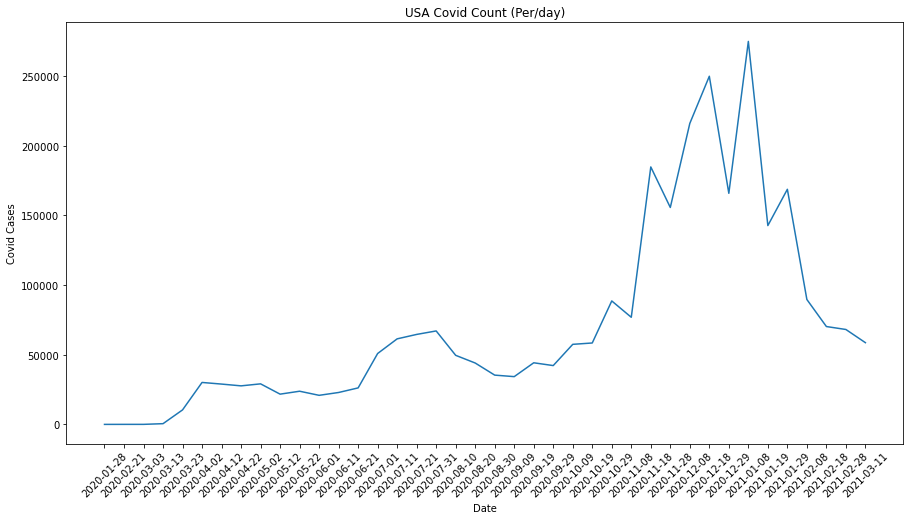

In [47]:
plt.figure(figsize=(15,7.75))
case_count = plt.plot(USA_Cases['Date'], USA_Cases['Case Count'])
plt.xticks(rotation=45);
plt.title("USA Covid Count (Per/day)")
plt.ylabel("Covid Cases")
plt.xlabel("Date")

Text(0.5, 1.0, 'USA Covid Count Per day')

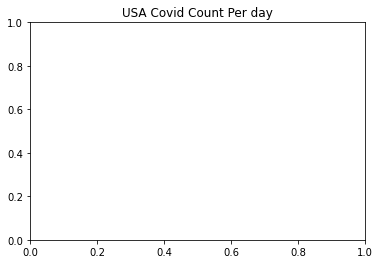